CB DS Applied Data Science With Python
<p>Angela Altobar</p>
<h1>Project 1: Feature Engineering</h1>


### 1) Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2) Read the dataset

In [2]:
df_pep = pd.read_csv('PEP1.csv')

In [3]:
type(df_pep)

pandas.core.frame.DataFrame

In [4]:
df_pep.shape

(1460, 81)

In [5]:
df_pep.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
pd.set_option('display.max_rows', None)

### Check for null values

In [7]:
df_pep.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
df_pep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Percent Missing per Column

<AxesSubplot:>

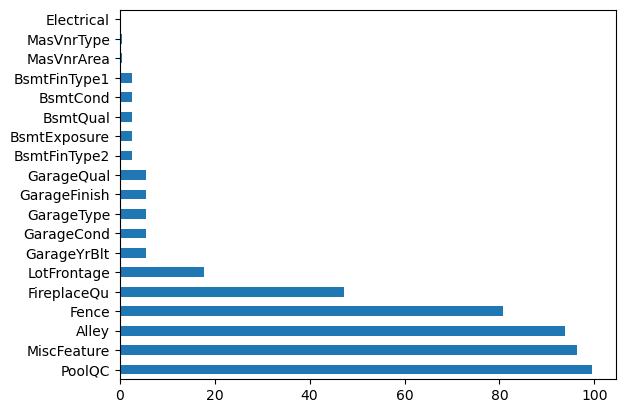

In [9]:
missing_percentages = df_pep.isna().sum().sort_values(ascending=False) / len(df_pep)*100
missing_percentages[missing_percentages !=0].plot(kind='barh')

- Delete columns ("Alley","PoolQC","Fence","MiscFeature","FireplaceQu") bc too many missing values

In [10]:
df_pep1 = df_pep.drop(["Id","Alley","PoolQC","Fence","MiscFeature","FireplaceQu"], axis=1)
df_pep1.shape

(1460, 75)

### Selection of Numerical and Categorical Varibles
- df_pepnum = numerical dataframe
- df_pepcat = catergorical dataframe

In [11]:
df_pepnum = df_pep1.select_dtypes(['integer','float'])
df_pepnum.shape

(1460, 37)

In [12]:
df_pepcat = df_pep1.select_dtypes(['object'])
df_pepcat.shape

(1460, 38)

## 3) Descriptive stats and EDA

Data Shape: Numerical Dataframe:  (1460, 37)
---------------------------------------------------
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549

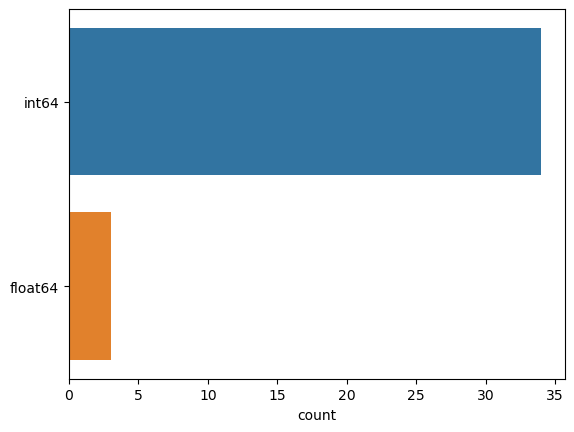

In [13]:
def giveBasicDetails(pepnum):
    print("Data Shape: Numerical Dataframe: ",df_pepnum.shape)
    print("---------------------------------------------------")
    with pd.option_context('display.max_columns', 38):
        print(df_pepnum.describe(include='all'))
    sns.countplot(y=df_pepnum.dtypes)
    plt.show()

giveBasicDetails(df_pepnum)

## (out of order) 3.4 Identify significant variables using a correlation matrix

<AxesSubplot:>

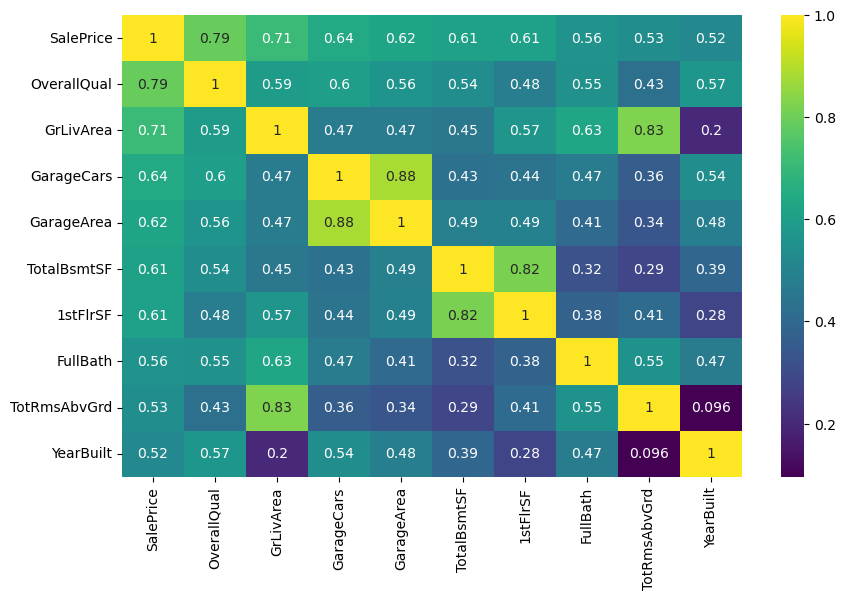

In [14]:
k = 10
cols = df_pepnum.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = df_pepnum[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap='viridis')

### Based off the heatmap, I have chosen to look at the following variables because they are strongly correlated with 'SalePrice':
- OverallQual
- GrLivArea
- GarageCars
- TotalBsmtSF


### 3.3 Identify the skewness and distribution

<Figure size 1400x600 with 0 Axes>

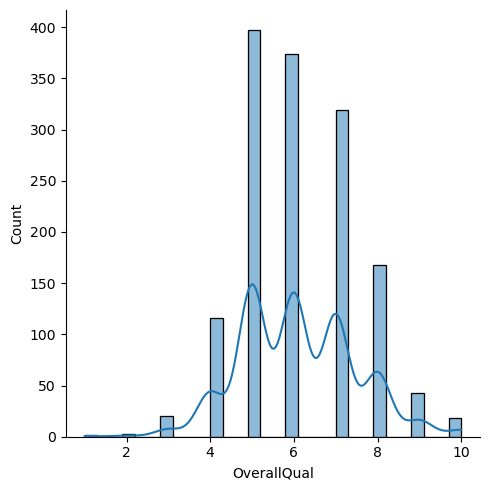

<Figure size 1400x600 with 0 Axes>

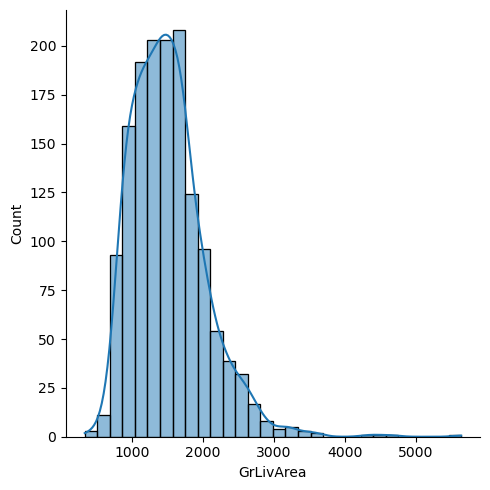

<Figure size 1400x600 with 0 Axes>

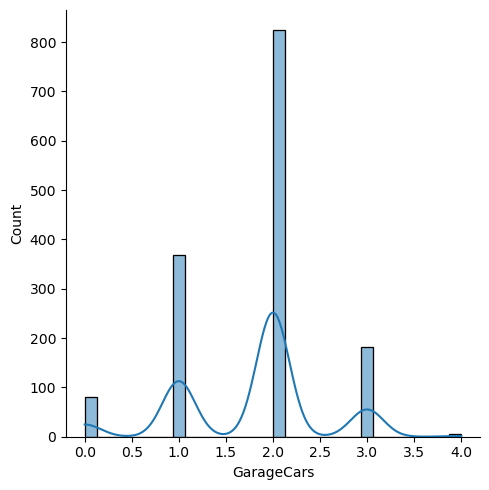

<Figure size 1400x600 with 0 Axes>

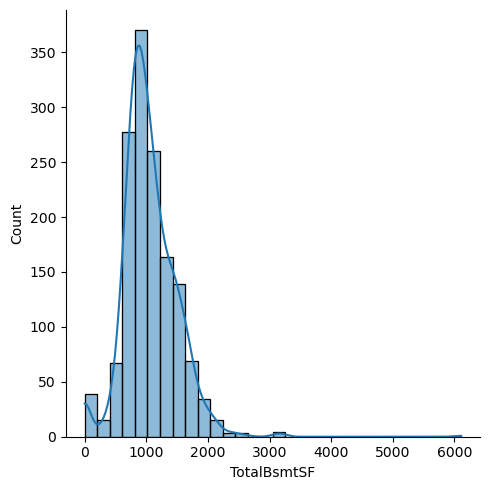

<Figure size 1400x600 with 0 Axes>

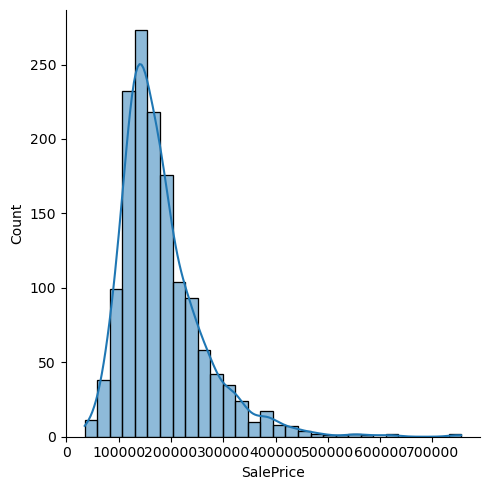

In [24]:
num_cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','SalePrice']

for i in range(0,len(num_cols)):
    plt.figure(figsize=(14,6))
    sns.displot(df_pepnum[num_cols[i]], bins = 30, kde=True)
    plt.tight_layout()
    plt.show()

### Boxplots

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


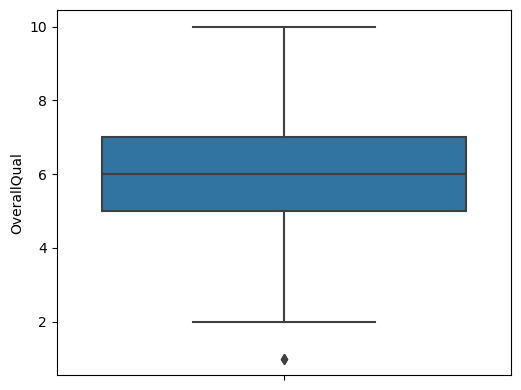

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


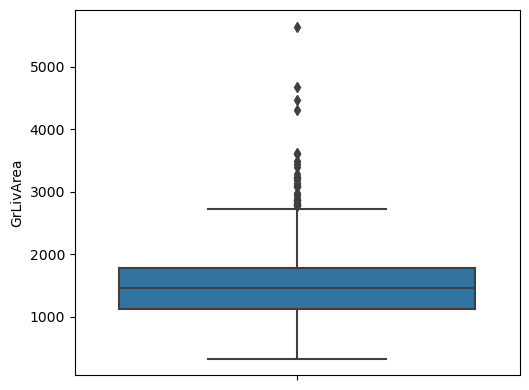

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


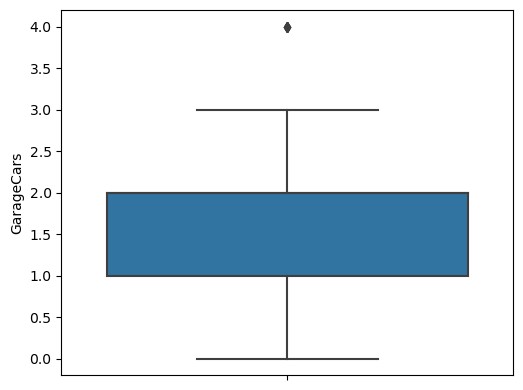

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


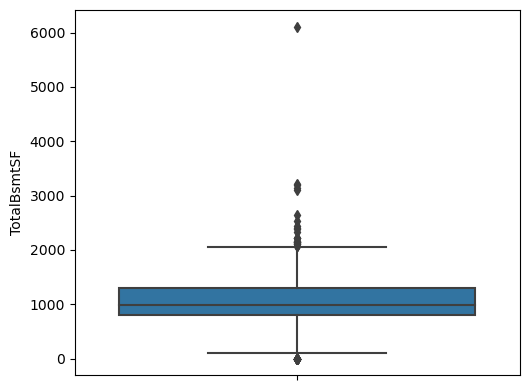

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


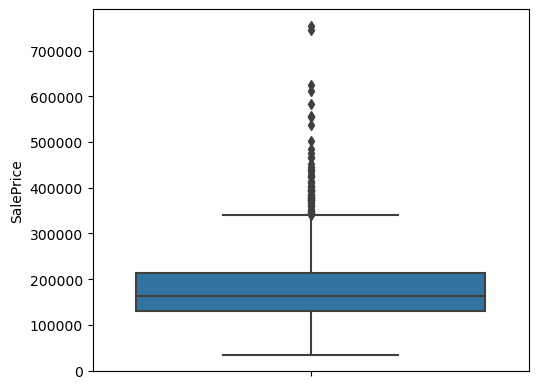

In [23]:
facet = None

for i in range(0,len(num_cols)):
    plt.figure(figsize=(10,4))
    plt.subplot(121)
    sns.boxplot(facet, df_pepnum[num_cols[i]], orient="v")
    plt.tight_layout()
    plt.show()

#### Observations
- OverallQual is slightly left-skewed. Would proceed with a log transformation and see if distribution looks more normal.
- GrLivArea is right-skewed. Would proceed with a log transformation and see if distribution looks more normal.
- GarageCars looks relatively normal.
- TotalBsmtSF is right-skewed. Would proceed with a log transformation and see if distribution looks more normal.

- Plot boxplots show some outliers, represented by the dots.



### 3.5 Pair plot for distribution and density

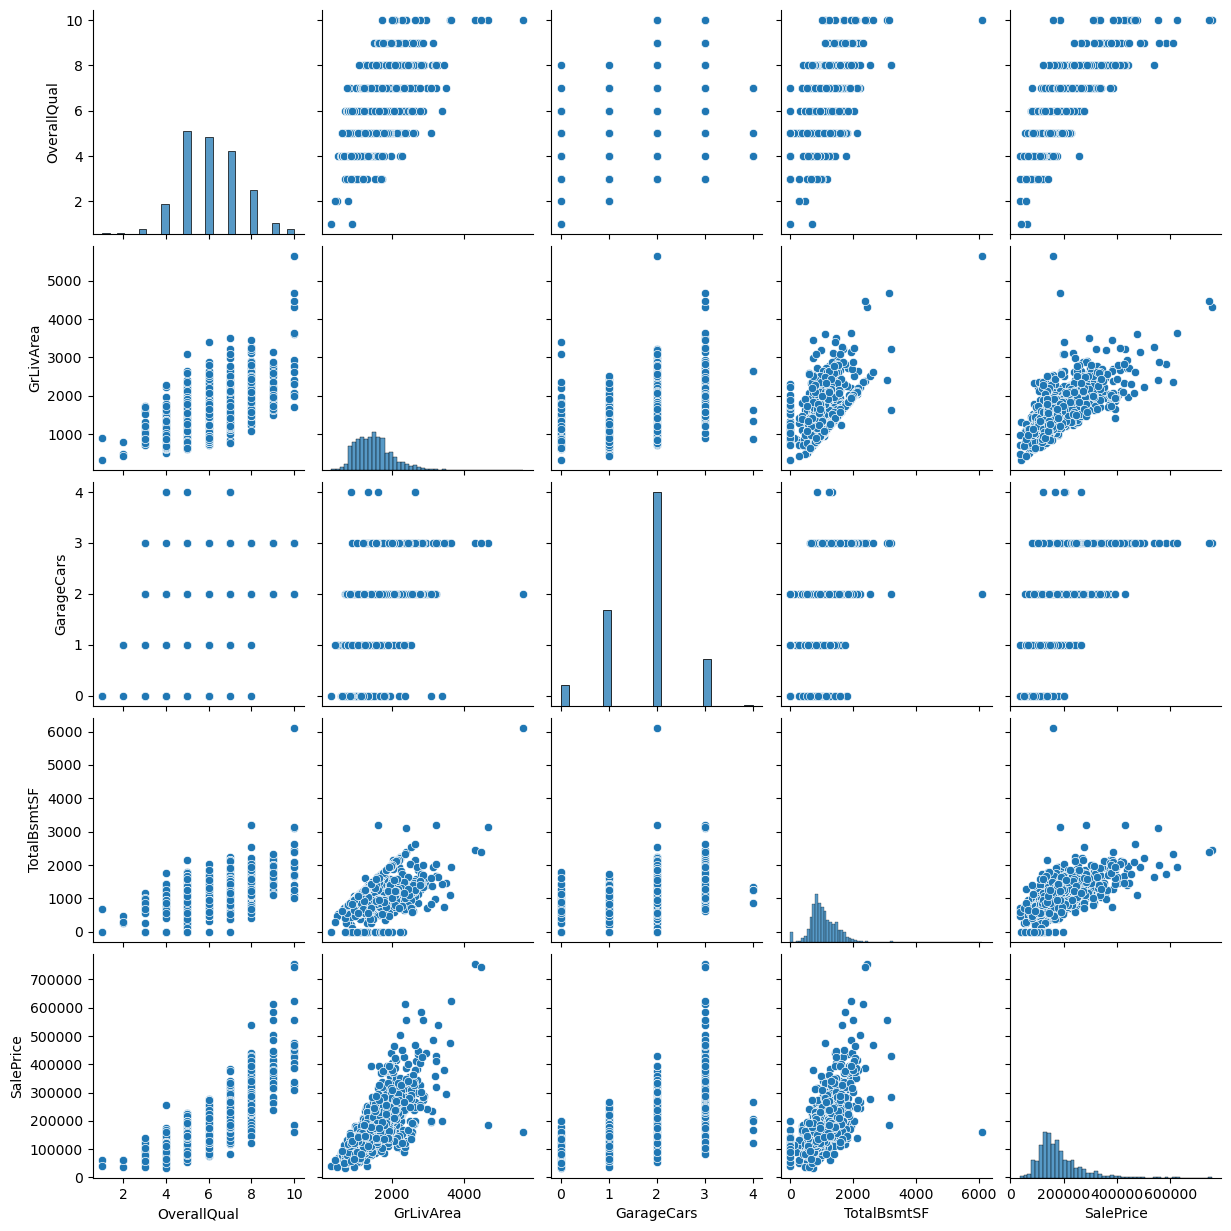

In [27]:
num_cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','SalePrice']
sns.pairplot(df_pepnum[num_cols])

### Numeric vs Categorical
- Neighborhood vs SalePrice

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Neighborhood', ylabel='SalePrice'>

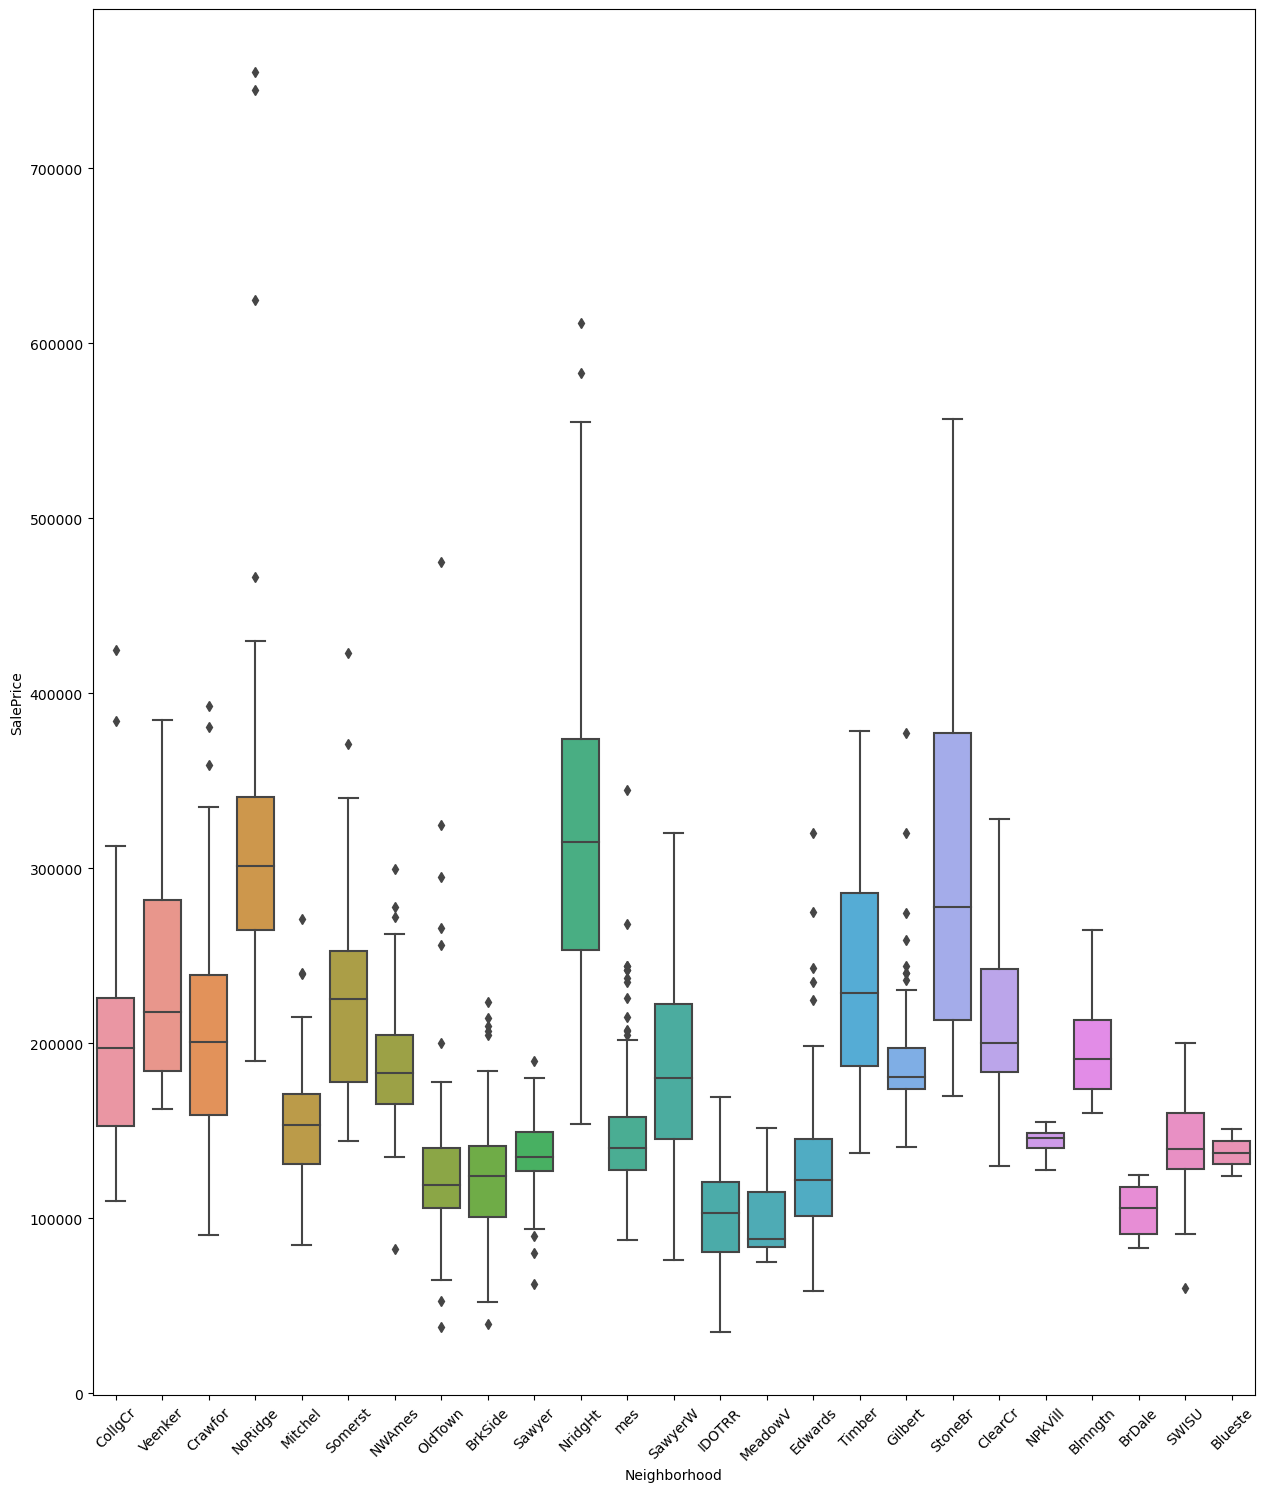

In [28]:
plt.figure(figsize=(15,18))
plt.xticks(rotation = 45)
sns.boxplot('Neighborhood','SalePrice', data=df_pep)

### Observation
- Since it looks like SalePrice changes with the individual neighborhoods, it may be a good predictor.

<b>The next CATEG vs NUMERIC variables we will look at are:</b>
- OverallQual vs SalePrice

C:\Users\angel\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\angel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\angel\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

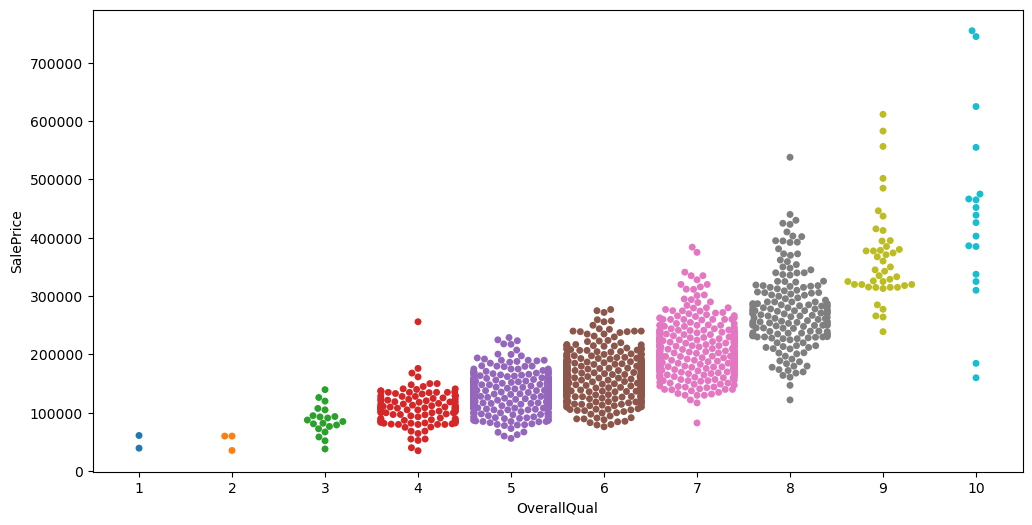

In [29]:
plt.figure(figsize=(12,6))
sns.swarmplot('OverallQual', 'SalePrice', data=df_pep)

### Observations
- We notice there is an increase in SalePrice as the overall quality increases. It's probably a good idea to use this variable to predict SalePrice.
- We also notice that there are many houses around the same price at Quality 9

### Categorical vs. Categorical
- crosstab or Neighborhood and OverallQuall

In [30]:
crosstab = pd.crosstab(index=df_pep['Neighborhood'], columns = df_pep['OverallQual'])
crosstab

OverallQual,1,2,3,4,5,6,7,8,9,10
Neighborhood,,,,,,,,,,
Blmngtn,0,0,0,0,0,0,14,3,0,0
Blueste,0,0,0,0,0,2,0,0,0,0
BrDale,0,0,0,0,5,11,0,0,0,0
BrkSide,1,1,3,10,21,18,4,0,0,0
ClearCr,0,0,0,3,6,10,9,0,0,0
CollgCr,0,0,0,1,28,24,71,23,3,0
Crawfor,0,0,0,1,11,19,13,7,0,0
Edwards,1,0,5,25,38,23,5,0,1,2
Gilbert,0,0,0,1,3,33,36,5,1,0


<AxesSubplot:xlabel='Neighborhood'>

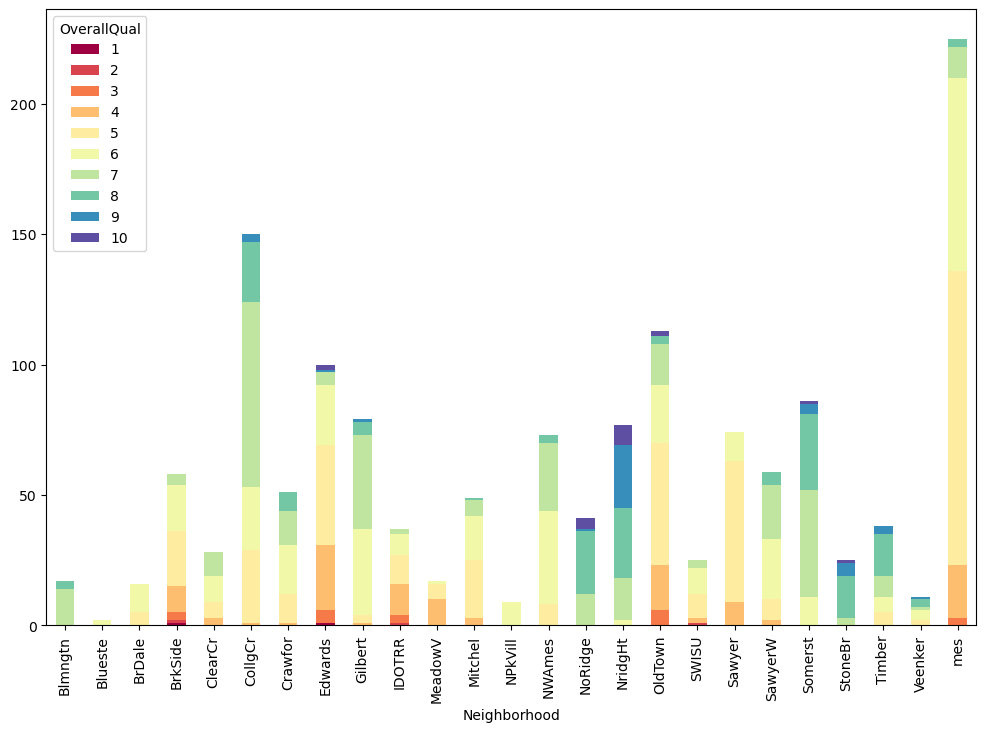

In [35]:
crosstab.plot(kind='bar', figsize = (12,8), stacked=True, colormap = 'Spectral')

In [41]:
df_pep['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'mes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

### Observation
- mes is not a name of a neighborhood... could possibly be a mistake or placeholder for unknown nighborhood in Ames county-- more investigation as to the rows with neighborhood "mes" needs to be carried out as many row entries list "mes" compared to all other neighborhoods